# EX1

Consider the dataset 'weatherAUS' called Rain in Australia. It describes the weather characteristics on different dates and locations. This dataset contains about 10 years of daily weather observations from many locations across Australia.

### 1. Preprocess the data, remove the attributes which were are not useful to predict rain. Also, remove rows with at least one missing value for each of them. 

In [4]:
import pandas as pd

In [8]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
categorical_features = [i for i in df.columns if df[i].dtype == 'O']
print(f"Number of Categorical Features: {len(categorical_features)}")

Number of Categorical Features: 7


In [10]:
numerical_features = [i for i in df.columns if df[i].dtype != 'O']
print(f"Number of Numerical Features: {len(numerical_features)}")

Number of Numerical Features: 16


In [11]:
for each_feature in categorical_features:
   unique_values = len(df[each_feature].unique())
   print("Unique Values of {} are: {}".format(each_feature, unique_values))

Unique Values of Date are: 3436
Unique Values of Location are: 49
Unique Values of WindGustDir are: 17
Unique Values of WindDir9am are: 17
Unique Values of WindDir3pm are: 17
Unique Values of RainToday are: 3
Unique Values of RainTomorrow are: 3


In [12]:
# We preprocess Date column dividing it into 3 separate columns
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop('Date',axis=1,inplace=True)

In [52]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [14]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
year                 0
month                0
day                  0
dtype: int64

In [25]:
df.dropna(inplace=True) # We simply drop rows from columns since dataset is massive

In [26]:
df.shape

(56420, 25)

In [27]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [28]:
categorical_features.pop(0)

'Date'

In [29]:
categorical_features.pop(-1)

'RainTomorrow'

In [30]:
categorical_features

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

We try to use chi_square test to find relation between categorical variables - independent ones with RainTomorrow Target feature

In [31]:
from scipy.stats import chi2_contingency
for i in categorical_features:
    data = pd.crosstab(df[i],df.RainTomorrow)
    stat, p, dof, expected = chi2_contingency(data)
    if p<0.01:
        print(f'{i} has relation with the RainTomorrow dependent variable')
    else:
        print(f'{i} has no relation with the RainTomorrow dependent variable')

Location has relation with the RainTomorrow dependent variable
WindGustDir has relation with the RainTomorrow dependent variable
WindDir9am has relation with the RainTomorrow dependent variable
WindDir3pm has relation with the RainTomorrow dependent variable
RainToday has relation with the RainTomorrow dependent variable


In [32]:
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

In [33]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,0,0,2009,1,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,0,0,2009,1,2
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,0,0,2009,1,4
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,0,0,2009,1,5
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1007.4,1.0,6.0,33.6,37.6,0,0,2009,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,1010.5,0.0,1.0,24.5,32.3,0,0,2017,6,20
142299,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,1011.2,7.0,0.0,24.8,32.0,0,0,2017,6,21
142300,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,1011.8,0.0,0.0,24.8,32.1,0,0,2017,6,22
142301,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,1010.7,1.0,1.0,24.8,29.2,0,0,2017,6,23


More complex and better methods exist for encoding categorical variables like Target Encoding with modifications to avoid target leakage however we'll go with label encoding even though its not recommended for analysis just for simplicity and maintaining same dimensionality

In [34]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
df['Location'] = label_encoder.fit_transform(df['Location'])

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features.

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<AxesSubplot:>

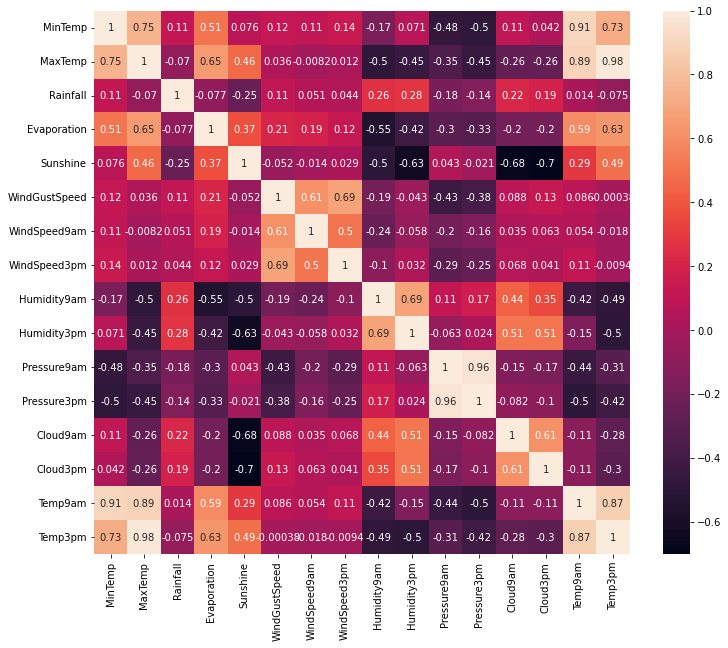

In [36]:
import seaborn as sns 
import matplotlib.pyplot as plt
fig = plt.subplots(figsize = (12,10))
sns.heatmap(df[numerical_features].corr(),annot=True)

### 2. Calculate the Variance Inflation Factor (VIF) value. VIF is a number that determines whether a variable has multicollinearity or not (starts from 1, and it has no upper limit. If the number gets larger, it means the variable has huge multicollinearity on it.). 

In [37]:
vif_data = pd.DataFrame()
ind_features = df[numerical_features]
vif_data["feature"] = ind_features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(ind_features.values, i)
                          for i in range(len(ind_features.columns))]
  
print(vif_data)

          feature            VIF
0         MinTemp      58.190540
1         MaxTemp     608.110140
2        Rainfall       1.277233
3     Evaporation       7.155897
4        Sunshine      17.318673
5   WindGustSpeed      26.613591
6    WindSpeed9am       8.398002
7    WindSpeed3pm      13.743843
8     Humidity9am      60.250618
9     Humidity3pm      47.801216
10    Pressure9am  423553.613361
11    Pressure3pm  421771.670406
12       Cloud9am       7.361623
13       Cloud3pm       8.318504
14        Temp9am     210.623646
15        Temp3pm     674.506892


We observe so much of our data suffers from multicollinearity

In [38]:
df_without_vif = df.copy(deep = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  int32  
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustDir    56420 non-null  int32  
 7   WindGustSpeed  56420 non-null  float64
 8   WindDir9am     56420 non-null  object 
 9   WindDir3pm     56420 non-null  object 
 10  WindSpeed9am   56420 non-null  float64
 11  WindSpeed3pm   56420 non-null  float64
 12  Humidity9am    56420 non-null  float64
 13  Humidity3pm    56420 non-null  float64
 14  Pressure9am    56420 non-null  float64
 15  Pressure3pm    56420 non-null  float64
 16  Cloud9am       56420 non-null  float64
 17  Cloud3pm       56420 non-null  float64
 18  Te

### 3. Remove multicollinearities by creating new features. Find the features that have paired values and create the new feature which is the difference value between those pairs.

In [40]:
df['Pressure_Interval'] = abs(df['Pressure9am'] - df['Pressure3pm'])
df['Humidity_Interval'] = abs(df['Humidity9am'] - df['Humidity3pm'])
df['TempInterval'] = abs(df['Temp9am'] - df['Temp3pm'])
df['CloudInterval'] = abs(df['Cloud9am'] - df['Cloud3pm'])
df['WindSpeedInterval'] = abs(df['WindSpeed9am'] - df['WindSpeed3pm'])
df['Temperature_Interval'] = abs(df['MaxTemp'] - df['MinTemp'])
# df['WindDirInterval'] = abs(df['WindDir9am'] - df['WindDir3pm'])

In [41]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,year,month,day,Pressure_Interval,Humidity_Interval,TempInterval,CloudInterval,WindSpeedInterval,Temperature_Interval
6049,4,17.9,35.2,0.0,12.0,12.3,11,48.0,ENE,SW,...,0,2009,1,1,1.9,7.0,6.8,3.0,14.0,17.3
6050,4,18.4,28.9,0.0,14.8,13.0,8,37.0,SSE,SSE,...,0,2009,1,2,0.8,22.0,6.7,0.0,0.0,10.5
6052,4,19.4,37.6,0.0,10.8,10.6,5,46.0,NNE,NNW,...,0,2009,1,4,3.1,20.0,6.2,5.0,15.0,18.2
6053,4,21.9,38.4,0.0,11.4,12.2,14,31.0,WNW,WSW,...,0,2009,1,5,3.6,15.0,6.5,4.0,0.0,16.5
6054,4,24.2,41.0,0.0,11.2,8.4,14,35.0,NW,WNW,...,0,2009,1,6,3.3,4.0,4.0,5.0,4.0,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,6,19.3,33.4,0.0,6.0,11.0,1,35.0,SE,NE,...,0,2017,6,20,3.4,31.0,7.8,1.0,11.0,14.1
142299,6,21.2,32.6,0.0,7.6,8.6,0,37.0,SE,SE,...,0,2017,6,21,3.4,28.0,7.2,7.0,2.0,11.4
142300,6,20.7,32.8,0.0,5.6,11.0,0,33.0,E,W,...,0,2017,6,22,3.5,23.0,7.3,0.0,6.0,12.1
142301,6,19.5,31.8,0.0,6.2,10.6,2,26.0,SE,NNW,...,0,2017,6,23,4.2,4.0,4.4,0.0,8.0,12.3


In [42]:
df = df.rename({'TempInterval':'Temp_time_interval'},axis=1)

Dropping the irrelevant features.

In [43]:
df.drop(['Pressure9am','Pressure3pm','MaxTemp','MinTemp','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','Cloud9am','Cloud3pm','WindSpeed9am','WindSpeed3pm'],axis=1,inplace=True)

In [44]:
df

,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,year,month,day,Pressure_Interval,Humidity_Interval,Temp_time_interval,CloudInterval,WindSpeedInterval,Temperature_Interval
6049,4,0.0,12.0,12.3,11,48.0,0,0,2009,1,1,1.9,7.0,6.8,3.0,14.0,17.3
6050,4,0.0,14.8,13.0,8,37.0,0,0,2009,1,2,0.8,22.0,6.7,0.0,0.0,10.5
6052,4,0.0,10.8,10.6,5,46.0,0,0,2009,1,4,3.1,20.0,6.2,5.0,15.0,18.2
6053,4,0.0,11.4,12.2,14,31.0,0,0,2009,1,5,3.6,15.0,6.5,4.0,0.0,16.5
6054,4,0.0,11.2,8.4,14,35.0,0,0,2009,1,6,3.3,4.0,4.0,5.0,4.0,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,6,0.0,6.0,11.0,1,35.0,0,0,2017,6,20,3.4,31.0,7.8,1.0,11.0,14.1
142299,6,0.0,7.6,8.6,0,37.0,0,0,2017,6,21,3.4,28.0,7.2,7.0,2.0,11.4
142300,6,0.0,5.6,11.0,0,33.0,0,0,2017,6,22,3.5,23.0,7.3,0.0,6.0,12.1
142301,6,0.0,6.2,10.6,2,26.0,0,0,2017,6,23,4.2,4.0,4.4,0.0,8.0,12.3


### 4. Remove features that have a VIF value above 5.

Calculating vif on new data

In [45]:
vif_data = pd.DataFrame()
ind_features = df.drop('RainTomorrow',axis=1)
vif_data["feature"] = ind_features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(ind_features.values, i)
                          for i in range(len(ind_features.columns))]
  
print(vif_data)

                 feature        VIF
0               Location   4.248011
1               Rainfall   1.598868
2            Evaporation   4.361599
3               Sunshine   8.927160
4            WindGustDir   3.959515
5          WindGustSpeed  13.071331
6              RainToday   2.159831
7                   year  33.324759
8                  month   4.726074
9                    day   4.208379
10     Pressure_Interval   6.016411
11     Humidity_Interval   6.566788
12    Temp_time_interval  14.407668
13         CloudInterval   1.941983
14     WindSpeedInterval   2.920867
15  Temperature_Interval  22.588767


Simply drop wherever vif>5 since we know thats an indication of high multicollinearity.

In [46]:
df.drop(list(vif_data[vif_data['VIF']>5]['feature']),axis=1,inplace=True)

### 5. Build a regression model to perform the Rain prediction. Also, tabulate accuracy of the prediction models, before and VIF computation.


In [47]:
X = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='sag', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='sag')

In [51]:
classifier_logreg.score(X_train,y_train)

0.7924937965260546

In [52]:
classifier_logreg.score(X_test,y_test)

0.7980326125487416

Model on data after VIF Computation doesnt suffer from overfitting or underfitting problem

In [53]:
df_without_vif['WindDir9am'] = label_encoder.fit_transform(df_without_vif['WindDir9am'])
df_without_vif['WindDir3pm'] = label_encoder.fit_transform(df_without_vif['WindDir3pm'])

In [54]:
X_wo = df_without_vif.drop('RainTomorrow',axis=1)
y_wo = df_without_vif['RainTomorrow']

In [55]:
df_without_vif

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
6049,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,1004.4,2.0,5.0,26.6,33.4,0,0,2009,1,1
6050,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,1012.1,1.0,1.0,20.3,27.0,0,0,2009,1,2
6052,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,1009.2,1.0,6.0,28.7,34.9,0,0,2009,1,4
6053,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,1009.1,1.0,5.0,29.1,35.6,0,0,2009,1,5
6054,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,1007.4,1.0,6.0,33.6,37.6,0,0,2009,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,6,19.3,33.4,0.0,6.0,11.0,1,35.0,9,4,...,1010.5,0.0,1.0,24.5,32.3,0,0,2017,6,20
142299,6,21.2,32.6,0.0,7.6,8.6,0,37.0,9,9,...,1011.2,7.0,0.0,24.8,32.0,0,0,2017,6,21
142300,6,20.7,32.8,0.0,5.6,11.0,0,33.0,0,13,...,1011.8,0.0,0.0,24.8,32.1,0,0,2017,6,22
142301,6,19.5,31.8,0.0,6.2,10.6,2,26.0,9,6,...,1010.7,1.0,1.0,24.8,29.2,0,0,2017,6,23


In [56]:
from sklearn.model_selection import train_test_split
X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(X_wo,y_wo, test_size = 0.2, random_state = 0)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_wo = scaler.fit_transform(X_train_wo)
X_test_wo = scaler.transform(X_test_wo)

In [58]:
classifier_logreg_wo = LogisticRegression(solver='sag', random_state=0)
classifier_logreg_wo.fit(X_train_wo, y_train_wo)

LogisticRegression(random_state=0, solver='sag')

In [59]:
classifier_logreg_wo.score(X_train_wo,y_train_wo)

0.8525567174760723

In [60]:
classifier_logreg_wo.score(X_test_wo,y_test_wo)

0.859092520382843

In [165]:
pd.DataFrame({'Without_Vif' : [classifier_logreg_wo.score(X_train_wo,y_train_wo),classifier_logreg_wo.score(X_test_wo,y_test_wo)],'With VIF':[classifier_logreg.score(X_train,y_train),classifier_logreg.score(X_test,y_test)]},index = ['Train Accuracy','Test Accuracy'])

,Without_Vif,With VIF
Train Accuracy,0.852557,0.792494
Test Accuracy,0.859093,0.798033


This just shows how removing multicollinearity from model doesn't improve the predictive power of the model. But, it improves model stability to changes in training data and there's an independent defined relation between dependent and explanatory variables

#  EX2

### Consider the 'HousePrice.csv' dataset which describes the features and sale price of a house. Build a regression model using regularization to predict the value of the properties.

#### 1. Perform the preprocessing if required, scale the train and test data using standard scaler.

In [5]:
df_2 = pd.read_csv('HousePrice.csv')

In [6]:
df_2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can see the data suffers serious missing data problem.

We'll drop features with massive missing data like - PoolQC, MiscFeature, Alley, Fence, FireplaceQu.

In [10]:
df_2.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],axis=1,inplace=True)

Id is useless column and offers no information about sales price, therefore we can safely drop it.

In [62]:
df_2.drop('Id',axis=1,inplace=True)

Store Names of categorical features and numerical features to use later in column transformers.

In [63]:
categorical_features = [column_name for column_name in df_2.columns if df_2[column_name].dtype == 'O']
print(f"Number of Categorical Features: {len(categorical_features)}")

Number of Categorical Features: 38


In [64]:
numerical_features = [column_name for column_name in df_2.columns if df_2[column_name].dtype != 'O']
print(f"Number of Numerical Features: {len(numerical_features)}")

Number of Numerical Features: 37


In [65]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [66]:
df_2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


#### 2. Split the dataset into train size of 70% and test size of 30% and Apply the Ridge and Lasso regression and fit the model containing all independent variables.

In [67]:
numerical_features.pop(-1)

'SalePrice'

We make pipelines for Ridge and Lasso Regression

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
nominal_pipeline = Pipeline([
    ('imputer_n' , SimpleImputer(strategy='most_frequent')),
    ('encoder_n', OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ('imputer_nu' , SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocessing_pipeline = ColumnTransformer([
    ('nominal_preprocessor', nominal_pipeline, categorical_features),
    ('numerical_preprocessor', numerical_pipeline, numerical_features)
])

In [69]:
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('Ridge',Ridge())
])
lasso_pipeline =  Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('Lasso',Lasso())
])


In [70]:
from sklearn.model_selection import train_test_split
X = df_2.drop('SalePrice',axis=1)
y = df_2['SalePrice']
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [71]:
model_ridge = ridge_pipeline.fit(x_train,y_train)
model_lasso = lasso_pipeline.fit(x_train,y_train)

In [72]:
print(f'The Ridge Regression Score {model_ridge.score(x_test,y_test)}')
print(f'The Lasso Regression Score {model_lasso.score(x_test,y_test)}')

The Ridge Regression Score 0.6663325998866223
The Lasso Regression Score 0.5817390733316211


Model Metrics are terrible, we'll have to tune for regularization parameter.


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# import numpy as np
# print(list(np.arange(0.001,1,0.01)))
para_dict = [{
    'alpha': [0.001,0.01,0.1,1,8.9999,9,10,11]
}]
model_cv_ridge = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('grid_search',GridSearchCV(estimator=Ridge(),
                                 param_grid=para_dict,
                                 cv = 10,
                                 scoring='r2',
                                 refit=True,))
])
model_cv_ridge.fit(x_train,y_train)
y_pred = model_cv_ridge.predict(x_test)
best_model_alpha = model_cv_ridge['grid_search'].best_params_
print(best_model_alpha)
print(f'The Ridge Regression Score {model_cv_ridge.score(x_test,y_test)}')
print(f'MSE of Model = {mean_squared_error(y_test,y_pred)}')
print(f'RMSE of Model = {mean_squared_error(y_test,y_pred,squared = False)}')

{'alpha': 8.9999}
The Ridge Regression Score 0.7155936128138786
MSE of Model = 1964067838.7116606
RMSE of Model = 44317.804985261406


A score of 0.71 is still much better, we can breath a bit easier now.

In [81]:
import warnings
warnings.filterwarnings('ignore')
para_dict = [{
    'alpha': [11,11.5,12,12.5,13,13.5]
}]
model_cv_lasso = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('grid_search',GridSearchCV(estimator=Lasso(tol=1e-2),
                                 param_grid=para_dict,
                                 cv = 10,
                                 scoring='r2',
                                 refit=True,))
])
# if the updates are smaller than 'tol', the optimization code 
# checks the dual gap for optimality and continues until it is smaller than 'tol'.
model_cv_lasso.fit(x_train,y_train)
y_pred = model_cv_lasso.predict(x_test)
best_model_alpha = model_cv_lasso['grid_search'].best_params_
print(best_model_alpha)
print(f'The Lasso Regression Score {model_cv_lasso.score(x_test,y_test)}')
print(f'MSE of Model = {mean_squared_error(y_test,y_pred)}')
print(f'RMSE of Model = {mean_squared_error(y_test,y_pred,squared = False)}')

{'alpha': 13.5}
The Lasso Regression Score 0.6006734979834731
MSE of Model = 2757688909.5765014
RMSE of Model = 52513.70211265343


An improvement is observed.

#### 3. Make predictions on test data “HousePriceTest.csv” and tabulate performance of both models on unseen data

In [83]:
pd.DataFrame({'With CV' : [model_cv_ridge.score(x_test,y_test),model_cv_lasso.score(x_test,y_test)],'Without CV':[model_ridge.score(x_test,y_test),model_lasso.score(x_test,y_test)]},index = ['Ridge','Lasso'])

,With CV,Without CV
Ridge,0.715594,0.666333
Lasso,0.600673,0.581739
